# Simple Deep Neural Network

In [67]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

This notebook demonstrates a simple `Deep Neural Network` (DNN) fitting to a very small data set of numbers that follow a pattern. It's meant to demonstrate how to setup a simple DNN using Tensorflow.

In [68]:
#!pip install tensorflow==2.5.0;

In [69]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

The `x` values below are inputs to the network. The `y` values can be considered outputs. The DNN attempts to learn the relationship or policy present between the two sets of numbers (for example, the equation of a line `y = mx + b` could be considered a policy).

In `equation_model` below, the dataset models `y = mx + b` where `m = 2` and `b = 1`.

In [79]:
def slope_of_a_line_model():
    """ Trains a very simple DNN on data that represents y=mx+b, where m=2 and b=1.
    
        Input: None
        Output: The trained y=mx+b DNN model.
    """
    # Define a custom callback so that we can stop training at 99% accuracy
    class myCallbacks(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=()):
            if logs.get('loss')<=0.01:
                print("Reached <= 0.1 loss, ending training!")
                self.model.stop_training = True
    callbacks = myCallbacks()
    
    # The input dataset
    xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
    ys = np.array([3.0, 5.0, 7.0, 9.0, 11.0, 13.0], dtype=float)

    # An extremely simple DNN
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer='sgd',
                  loss='mean_squared_error')
    model.fit(xs, ys, epochs=1000, callbacks=[callbacks])
    
    return model

In [80]:
# Save the model for use
model = slope_of_a_line_model()

Epoch 1/1000
1/1 [==============================] - 0s 127ms/step - loss: 220.8225
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 102.2057
Epoch 3/1000
1/1 [==============================] - 0s 998us/step - loss: 47.3063
Epoch 4/1000
1/1 [==============================] - 0s 995us/step - loss: 21.8972
Epoch 5/1000
1/1 [==============================] - 0s 998us/step - loss: 10.1370
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.6941
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.1749
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0089
Epoch 9/1000
1/1 [==============================] - 0s 998us/step - loss: 0.4693
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 13/1000
1/1 [=============

In [81]:
input_values = (1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0)
correct_outputs = (3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0)
predictions = []

for index, input_value  in enumerate(input_values):
    new_prediction = model.predict([input_value])
    predictions.append(new_prediction[0])
    print("Input: {}\nOutput: {}\nCorrect Output: {}\n".format(value, new_prediction[0][0], correct_outputs[index]))

Input: 10.0
Output: 2.874028205871582
Correct Output: 3.0

Input: 10.0
Output: 4.897006511688232
Correct Output: 5.0

Input: 10.0
Output: 6.919984817504883
Correct Output: 7.0

Input: 10.0
Output: 8.942963600158691
Correct Output: 9.0

Input: 10.0
Output: 10.9659423828125
Correct Output: 11.0

Input: 10.0
Output: 12.988920211791992
Correct Output: 13.0

Input: 10.0
Output: 15.0118989944458
Correct Output: 15.0

Input: 10.0
Output: 17.03487777709961
Correct Output: 17.0

Input: 10.0
Output: 19.0578556060791
Correct Output: 19.0

Input: 10.0
Output: 21.080835342407227
Correct Output: 21.0



Text(0, 0.5, 'y-coordinates')

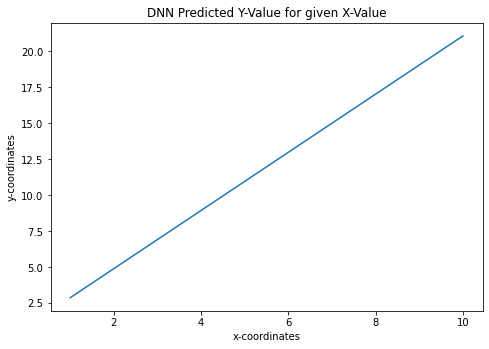

In [82]:
from matplotlib import pyplot as plt
%matplotlib inline
x = input_values
y = predictions
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_title("DNN Predicted Y-Value for given X-Value")
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')